<a href="https://colab.research.google.com/github/kyle-gao/GRSS_TrackMSD2021/blob/main/NaipLandsatTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://dfc2021.blob.core.windows.net/competition-data/naip-2013/546_naip-2013.tif
!wget https://dfc2021.blob.core.windows.net/competition-data/naip-2017/546_naip-2017.tif
!wget https://dfc2021.blob.core.windows.net/competition-data/landsat-2013/546_landsat-2013.tif
!wget https://dfc2021.blob.core.windows.net/competition-data/nlcd-2013/546_nlcd-2013.tif

--2020-12-08 18:55:48--  https://dfc2021.blob.core.windows.net/competition-data/naip-2013/546_naip-2013.tif
Resolving dfc2021.blob.core.windows.net (dfc2021.blob.core.windows.net)... 52.239.169.100
Connecting to dfc2021.blob.core.windows.net (dfc2021.blob.core.windows.net)|52.239.169.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67063964 (64M) [application/octet-stream]
Saving to: ‘546_naip-2013.tif’

546_naip-2013.tif   100%[===================>]  63.96M  19.3MB/s    in 3.3s    

2020-12-08 18:55:52 (19.3 MB/s) - ‘546_naip-2013.tif’ saved [67063964/67063964]

--2020-12-08 18:55:52--  https://dfc2021.blob.core.windows.net/competition-data/naip-2017/546_naip-2017.tif
Resolving dfc2021.blob.core.windows.net (dfc2021.blob.core.windows.net)... 52.239.169.100
Connecting to dfc2021.blob.core.windows.net (dfc2021.blob.core.windows.net)|52.239.169.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66918217 (64M) [application/octet-stre

#Trying GDAL since the contest mentions this python library

In [ ]:
import gdal
import matplotlib.pyplot as plt
import numpy as np

#NAIP
4 channels: (r,g,b,nir) \
image size 3880x3880

In [ ]:
naip2013 = gdal.Open("/content/546_naip-2013.tif")

In [ ]:
naip2013.GetProjection()

'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'

In [ ]:
naip_arr = naip2013.ReadAsArray()

In [ ]:
naip_arr.shape
#channels r,g,b,nir

(4, 3880, 3880)

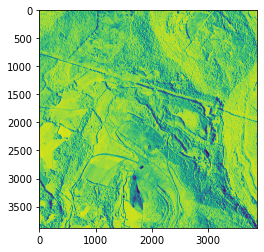

In [ ]:
plt.imshow(naip_arr[3,:,:])

In [ ]:
naip_rgb = naip_arr[0:3,:,:]
naip_rgb = naip_rgb.transpose([1,2,0])

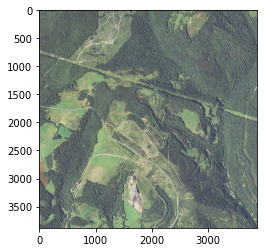

In [ ]:
plt.imshow(naip_rgb)

In [ ]:
naip2013.GetGeoTransform()

(-8800447.2483, 1.288659793814433, 0.0, 4805315.2553, 0.0, -1.288659793814433)

In [ ]:
naip2017 = gdal.Open("/content/546_naip-2017.tif")
naip2017.GetGeoTransform()

(-8800447.2483, 1.288659793814433, 0.0, 4805315.2553, 0.0, -1.288659793814433)

In [ ]:
def get_arrays_naip(naip_path):
  naip = gdal.Open(naip_path).ReadAsArray().transpose([1,2,0])
  return naip[:,:,0:3],naip[:,:,3]

In [ ]:
(naip2017rgb, naip2017ir) = get_arrays_naip("/content/546_naip-2017.tif")

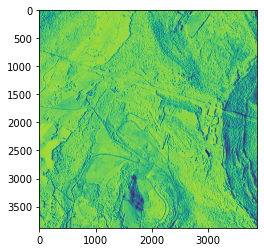

In [ ]:
plt.imshow(naip2017ir)

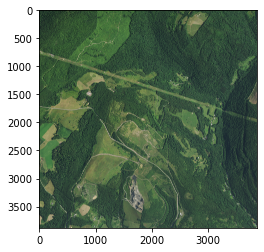

In [ ]:
plt.imshow(naip2017rgb)

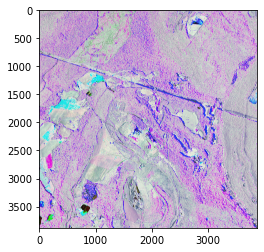

In [ ]:
plt.imshow(naip2017rgb-naip_rgb)

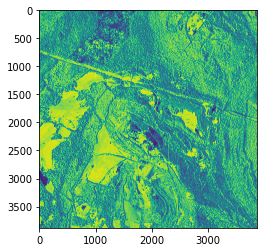

In [ ]:
plt.imshow(naip2017ir-naip_arr[3,:,:])

#Landsat 
9 channels of IR 

3880x3880


In [ ]:
landsat2013 = gdal.Open("/content/546_landsat-2013.tif")

In [ ]:
landsat2013_arr = landsat2013.ReadAsArray()

In [ ]:
landsat2013_arr.shape

(9, 3880, 3880)

In [ ]:
landsat2013.GetGeoTransform() #same

(-8800447.2483, 1.288659793814433, 0.0, 4805315.2553, 0.0, -1.288659793814433)

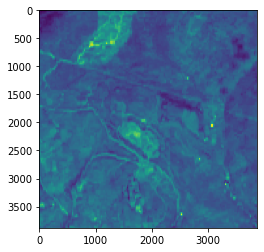

In [ ]:
plt.imshow(landsat2013_arr[0,:,:])

#NLCD 

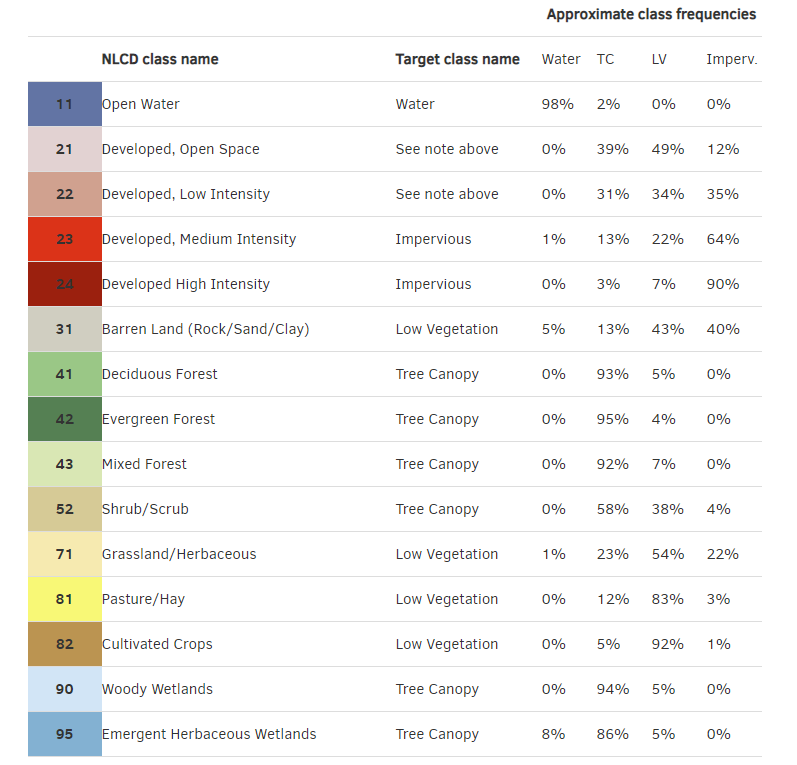

Interested in 8 classes (gain or loss in the 4 target classes)


From Image Analysis, Classification and Change Detection textbook:
"If classification is carried out at the pixel level (as opposed to using segments
or objects), then classification errors (typically > 5%) may corrupt or even
dominate the true change signal, depending on the strength of the latter." 

In [ ]:
nlcd2013 = gdal.Open("/content/546_nlcd-2013.tif")

In [ ]:
nlcd2013_arr = nlcd2013.ReadAsArray()
nlcd2013_arr.shape

(3880, 3880)

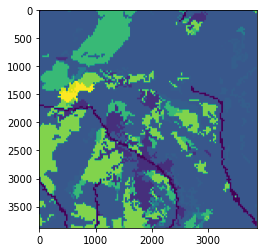

In [ ]:
plt.imshow(nlcd2013_arr)

#arosics test

In [ ]:
!pip install arosics==0.8.0

  Using cached https://files.pythonhosted.org/packages/3f/93/4693fd2706cb47e78ad3c7d09260dd069baad549449ff19a4d94a3401ef3/arosics-0.8.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/f7/a4/e66aafbefcbb717813bf3a355c8c4fc3ed04ea1dd7feb2920f2f4f868921/geopandas-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/92/315e000b9f1a19ff49a9cc8a74775a85ede7403588bd1e47219d4aefcbd6/geoarray-0.10.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/ea/89/bec8718efad0982ead195883beee1934fd03e8c9816472d37ae27d9dcdff/py_tools_ds-0.16.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/48/02/d0f19b00b252fd972e3daec05be73aa811091528f21b90442a15d6a96d89/cmocean-2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/37/94/4910fd55246c1d963727b03885ead6ef1cd3748a465f7b0239ab25dfc9a3/Fiona-1.8.18-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e4/ab/280e80a67cfc109d15428c0ec

#Ideas:

*   EfficientNet based U-Net as deep learning architecture?
*   Can use a linear combination of bands instead of a 4+9 band image (multivariate alteration detection). Note that EfficientNet and most CNN takes in 3 channels/bands. 
*   The L.C coefficients can be solved using Cannonical Correlation Analysis. (Makes use of Lagrange Multiplier) CCA also returns a new set of bands (cannonical variates), ordered by correlation strength.
*   Scatterplot matching for radiometric normalization?




